# **Setup Steps** - Required
1. Uncomment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to uncomment the whole cell)
2. Run the first code cell to uninstall the conflicting packages.
3. Run the second code cell to install the package dependencies. This might take several minutes.
4. Restart the notebook runtime before continuing. To do so, open the `Runtime` menu and click `Restart runtime` in the drop-down menu as shown in the image below. Once the notebook kernel restarts do not run the first two code cells again.
![google-colab-restart-notebook-runtime](https://github.com/cj-mills/christianjmills/raw/master/images/icevision-openvino-unity-tutorial/google-colab-restart-notebook-runtime.png)
5. Re-comment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to comment the whole cell).
6. Execute the notebook starting from the `from icevision.all import *` cell.
7. You will know everything is working if the `from icevision.all import *` cell has the following output.
```text
INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31
```
8. Make sure you have a Kaggle API key so you can download the dataset from Kaggle. ([steps](https://christianjmills.com/Fastai-to-Unity-Tutorial-1/#configure-kaggle-api))

**Uninstall conflicting packages**

In [1]:
# %%capture 
# !pip uninstall tensorflow -y
# !pip uninstall thinc -y
# !pip uninstall fastai -y
# !pip uninstall fastcore -y
# !pip uninstall spacy -y
# !pip uninstall en-core-web-sm -y
# !pip uninstall torchtext -y

**Install Dependencies**

In [2]:
# %%capture
# !pip install -U torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
# !pip install mmdet==2.17.0
# !pip install icevision==0.11.0
# !pip install icedata==0.5.1
# !pip install -U setuptools==59.5.0
# !pip install -U pillow
# !pip install -U numpy

**Import IceVision library**

In [3]:
from icevision.all import *

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [4]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Define path to dataset**

In [5]:
data_dir = icedata.pennfudan.load_data()
data_dir

  0%|          | 0/53723336 [00:00<?, ?B/s]

Path('/root/.icevision/data/PennFudanPed')

In [6]:
pd.DataFrame(list(data_dir.ls()))

,0
0,/root/.icevision/data/PennFudanPed/Annotation
1,/root/.icevision/data/PennFudanPed/added-object-list.txt
2,/root/.icevision/data/PennFudanPed/PedMasks
3,/root/.icevision/data/PennFudanPed/pennfundan.zip
4,/root/.icevision/data/PennFudanPed/readme.txt
5,/root/.icevision/data/PennFudanPed/PNGImages


In [7]:
img_dir = data_dir/'PNGImages'

**Get image file paths**

In [8]:
files = get_image_files(img_dir)
len(files)

170

**Inspect files**

In [9]:
pd.DataFrame([files[0], files[-1]])

,0
0,/root/.icevision/data/PennFudanPed/PNGImages/FudanPed00001.png
1,/root/.icevision/data/PennFudanPed/PNGImages/PennPed00096.png


**Inspect one of the training images**

Image Dims: (536, 559)


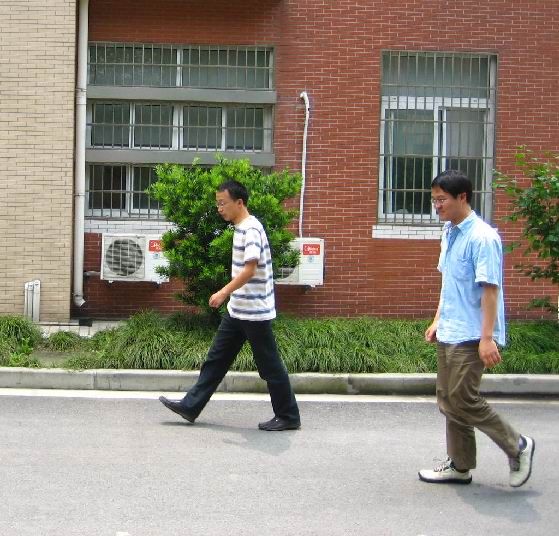

In [10]:
import PIL
img = PIL.Image.open(files[0]).convert('RGB')
print(f"Image Dims: {img.shape}")
img

**Create a dictionary that maps image names to file paths**

In [11]:
img_dict = {file.name.split('.')[0] : file for file in files}
list(img_dict.items())[0]

('FudanPed00001',
 Path('/root/.icevision/data/PennFudanPed/PNGImages/FudanPed00001.png'))

**Create a custom parser object**

In [12]:
parser = icedata.pennfudan.parser(data_dir)
len(parser)

170

**Parse annotations to create records**

In [13]:
train_records, valid_records = parser.parse()

  0%|          | 0/170 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/170 [00:00<?, ?it/s]

In [14]:
class_labels_file_name = f"{data_dir.name}-classes.json"

In [15]:
class_labels = {"classes": parser.class_map.get_classes()}
class_labels

{'classes': ['background', 'person']}

In [16]:
import json

with open(class_labels_file_name, "w") as write_file:
    json.dump(class_labels, write_file)
    
class_labels_file_name

'PennFudanPed-classes.json'

**Inspect training records**

In [17]:
train_records[0]

BaseRecord

common: 
	- Image size [435, 404]
	- Record ID: 29
	- Filepath: /root/.icevision/data/PennFudanPed/PNGImages/FudanPed00029.png
	- Img: None
detection: 
	- BBoxes: [<BBox (xmin:246, ymin:72, xmax:368, ymax:351)>]
	- masks: [<icevision.core.mask.MaskFile object at 0x7f9ed3e7ead0>]
	- mask_array: None
	- Class Map: <ClassMap: {'background': 0, 'person': 1}>
	- Labels: [1]

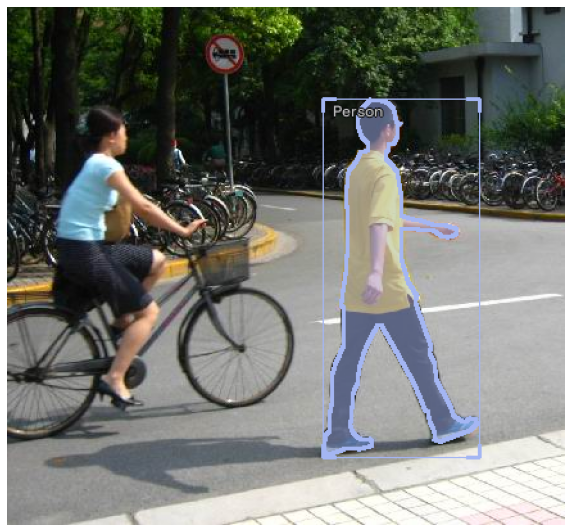

In [18]:
show_record(train_records[0], figsize = (10,10), display_label=True )

In [19]:
show_records(train_records[1:4], ncols=3,display_label=True)

Output hidden; open in https://colab.research.google.com to view.

**Define input resolution**

In [20]:
image_size = 512
presize = 1024

**Define Transforms**

In [21]:
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

**Get normalization stats**

In [22]:
mean = tfms.A.Normalize().mean
std = tfms.A.Normalize().std
mean, std

((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

**Define Datasets**

In [23]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)
train_ds, valid_ds

(<Dataset with 136 items>, <Dataset with 34 items>)

**Apply augmentations to a training sample**

In [24]:
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

Output hidden; open in https://colab.research.google.com to view.

**Define model type**

In [25]:
model_type = models.torchvision.mask_rcnn

**Define backbone**

In [26]:
backbone = model_type.backbones.resnet50_fpn()
pd.DataFrame.from_dict(backbone.__dict__, orient='index')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

0
backbone_fn                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

**Define batch size**

In [27]:
bs = 4

**Define DataLoaders**

In [28]:
train_dl = model_type.train_dl(train_ds, batch_size=bs, num_workers=2, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=bs, num_workers=2, shuffle=False)

In [29]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=8, shuffle=False)

In [30]:
valid_batch = first(valid_dl)
infer_batch = first(infer_dl)

In [31]:
(valid_images, valid_labels), valid_records = valid_batch

In [32]:
model_type.show_batch(first(valid_dl), ncols=4)

Output hidden; open in https://colab.research.google.com to view.

**Instantiate the model**

In [33]:
model = model_type.model(backbone=backbone, num_classes=icedata.pennfudan.NUM_CLASSES) 

**Define metrics**

In [34]:
metrics = [COCOMetric(metric_type=COCOMetricType.mask)]

**Define Learner object**

In [35]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

**Find learning rate**

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


SuggestedLRs(valley=7.585775892948732e-05)

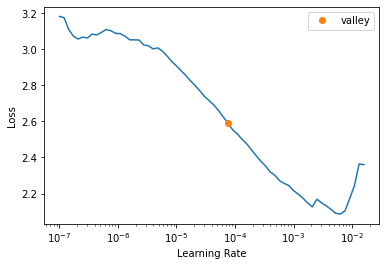

In [36]:
learn.lr_find()

**Define learning rate**

In [37]:
lr = 3e-4

**Define number of epochs**

In [38]:
epochs = 20

**Finetune model**

In [39]:
learn.fine_tune(epochs, lr, freeze_epochs=1)

epoch,train_loss,valid_loss,COCOMetric,time
0,1.747377,1.368527,0.000000,00:20


epoch,train_loss,valid_loss,COCOMetric,time
0,1.302254,1.220440,0.000000,00:28
1,1.148698,0.813200,0.000000,00:26
2,0.921283,0.672861,0.000000,00:26
3,0.769450,0.629022,0.000000,00:27
4,0.684959,0.586549,0.000000,00:29
5,0.614527,0.547798,0.000000,00:29
6,0.578592,0.525160,0.000000,00:28
7,0.549923,0.499013,0.000000,00:28
8,0.528239,0.523025,0.000000,00:28
9,0.506638,0.496166,0.000000,00:29


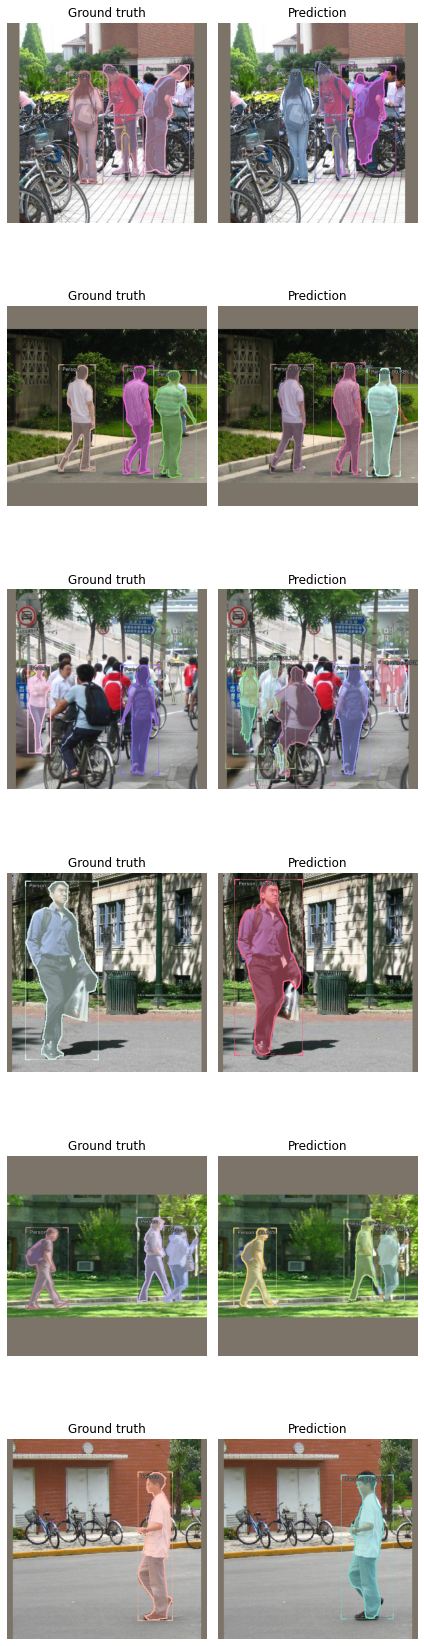

In [40]:
model_type.show_results(model, valid_ds, detection_threshold=.5)

In [41]:
learn.model

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu):

In [42]:
learn.model

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu):

In [43]:
checkpoint_path = f"{data_dir.name}-{type(model).__name__}.pth"
checkpoint_path

'PennFudanPed-MaskRCNN.pth'

In [44]:
torch.save(model.state_dict(), checkpoint_path)

In [45]:
with open(class_labels_file_name, "r") as read_file:
    classes = json.loads(read_file.read())
classes['classes']

['background', 'person']

In [46]:
checkpoint_and_model = models.model_from_checkpoint(checkpoint_path, 
                                                    model_name='torchvision.mask_rcnn', 
                                                    backbone_name='resnet50_fpn',
                                                    img_size=512, 
                                                    classes=classes['classes'],
                                                   )

load checkpoint from local path: PennFudanPed-MaskRCNN.pth


In [47]:
# Just logging the info
model_type = checkpoint_and_model["model_type"]
backbone = checkpoint_and_model["backbone"]
class_map = checkpoint_and_model["class_map"]
img_size = checkpoint_and_model["img_size"]

In [48]:
class_map

<ClassMap: {'background': 0, 'person': 1}>

In [49]:
model = checkpoint_and_model["model"]

device=next(model.parameters()).device
device

device(type='cpu')

In [50]:
# Transforms
img_size = checkpoint_and_model["img_size"]
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

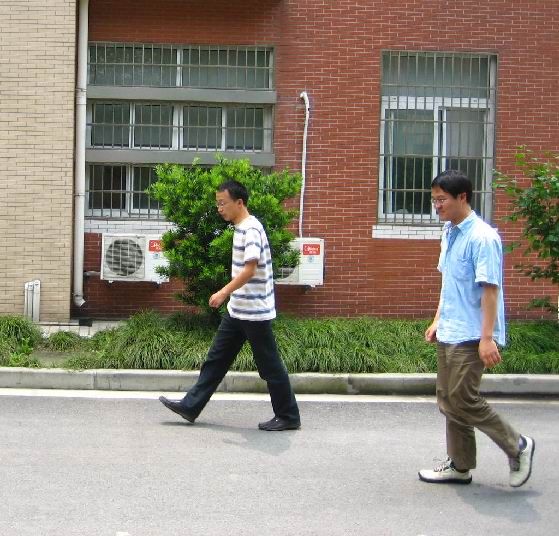

In [51]:
test_img = open_img(files[0])
test_img

In [52]:
infer_tfms = tfms.A.Adapter([tfms.A.Normalize()])
infer_ds = Dataset.from_images([test_img], infer_tfms)
infer_dl = model_type.infer_dl(infer_ds, batch_size=1, shuffle=False)

In [53]:
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
preds[0].ground_truth

BaseRecord

common: 
	- Image size ImgSize(width=559, height=536)
	- Img: 559x536x3 <np.ndarray> Image
	- Record ID: 0
detection: 
	- Class Map: None

In [55]:
preds[0].pred

BaseRecord

common: 
	- Image size ImgSize(width=559, height=536)
	- Img: 559x536x3 <np.ndarray> Image
	- Record ID: 0
detection: 
	- masks: []
	- mask_array: <icevision.core.mask.MaskArray object at 0x7f9ed3d09450>
	- Class Map: None
	- Labels: [1, 1]
	- BBoxes: [<BBox (xmin:405.9840393066406, ymin:167.59425354003906, xmax:530.8009643554688, ymax:488.368408203125)>, <BBox (xmin:171.70004272460938, ymin:180.469970703125, xmax:318.0566101074219, ymax:436.35736083984375)>]
	- Scores: [0.9956792 0.9906921]

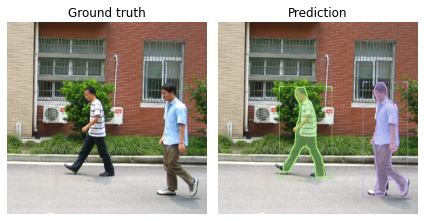

In [56]:
show_preds(preds=preds)